In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from dotenv import load_dotenv

In [2]:
class BatsmanState(TypedDict):
    runs: int
    balls: int 
    fours: int
    sixes: int


    #Strike Rate : sr , Balls per Boundary : bpb , Boundary Percentage : boundary_percents
    sr: float
    bpb: float
    boundary_percent: float
    summary: str


In [3]:
def calculate_sr(state:BatsmanState):
    sr = (state['runs']/state['balls'])*100
    state['sr'] = sr
    return {'sr': sr}

In [4]:
def calculate_bpb(state:BatsmanState):
    bpb = state['balls']/(state['fours']+state['sixes'])
    state['bpb'] = bpb
    return {'bpb': bpb}

In [5]:
def calculate_boundary_percent(state:BatsmanState)->BatsmanState:
    boundary_percent = (((state[ 'fours'] * 4) + (state['sixes'] * 6))/ state['runs']) * 100
    state['boundary_percent'] = boundary_percent
    return {'boundary_percent': boundary_percent}

In [6]:
def summary(state:BatsmanState):
    summary = f"""
Strike Rate - {state['sr']} \n
Ball per Boundary - {state['bpb']} \n
Boundary Percent - {state['boundary_percent']}
"""
    
    state['summary'] = summary
    return {'summary':summary}

In [7]:
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr',calculate_sr)
graph.add_node('calculate_bpb',calculate_bpb)
graph.add_node('calculate_boundary_percent',calculate_boundary_percent)
graph.add_node('summary',summary)

graph.add_edge(START,'calculate_sr')
graph.add_edge(START,'calculate_bpb')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_sr','summary')
graph.add_edge('calculate_bpb','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

workflow = graph.compile()

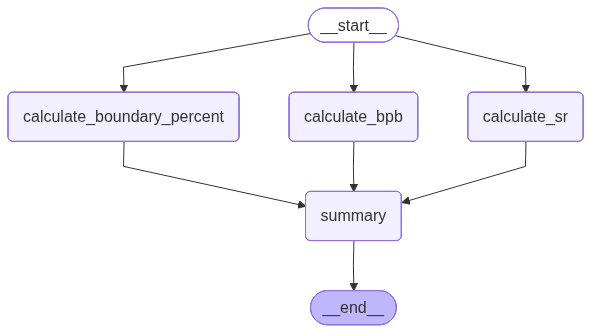

In [8]:
#to visualize the  updated graph use 
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [9]:
initial_state = {
    'runs':100,
    'balls':50,
    'fours':6,
    'sixes':4

}

final_state = workflow.invoke(initial_state)


In [10]:
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'sr': 200.0, 'bpb': 5.0, 'boundary_percent': 48.0, 'summary': '\nStrike Rate - 200.0 \n\nBall per Boundary - 5.0 \n\nBoundary Percent - 48.0\n'}
